<a href="https://colab.research.google.com/github/UtkarshAIITB/DL_Coursera_Assignments/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I Utkarsh Agiwal declare that the work done in this file is solely based on my intellect and hasn't be plagiarised from anywhere.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import csv
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rest = pd.read_csv('/content/drive/MyDrive/restaurent.csv')   #importing the data
rest.head()

,food,decor,service,price
0,18.0,22.0,17.0,41.0
1,24.0,22.0,22.0,54.0
2,18.0,17.0,14.0,32.0
3,18.0,9.0,13.0,20.0
4,21.0,12.0,16.0,25.0


In [4]:
random = rest.sample(n = 50)
random.head()

,food,decor,service,price
82,15.0,22.0,15.0,11.0
70,20.0,18.0,20.0,48.0
69,23.0,9.0,16.0,30.0
41,18.0,16.0,19.0,35.0
57,16.0,18.0,15.0,33.0


In [5]:
random.shape       #taken randomly 50 data points

(50, 4)

In [6]:
random.reset_index(drop = True, inplace = True)
random.head()

,food,decor,service,price
0,15.0,22.0,15.0,11.0
1,20.0,18.0,20.0,48.0
2,23.0,9.0,16.0,30.0
3,18.0,16.0,19.0,35.0
4,16.0,18.0,15.0,33.0


## Q1.

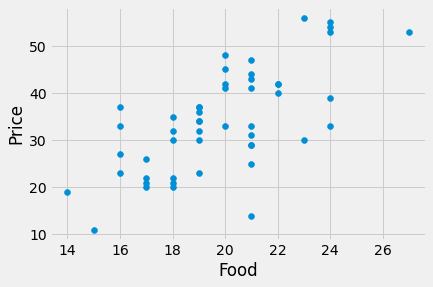

In [7]:
#  price vs food
plt.style.use('fivethirtyeight')
plt.scatter(random['food'], random['price'])
plt.xlabel('Food')
plt.ylabel('Price')
plt.show()

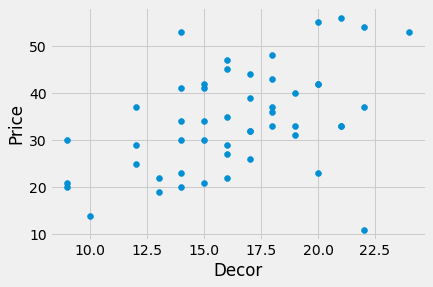

In [8]:
# price vs decor
plt.scatter(random['decor'], random['price'])
plt.xlabel('Decor')
plt.ylabel('Price')
plt.show()

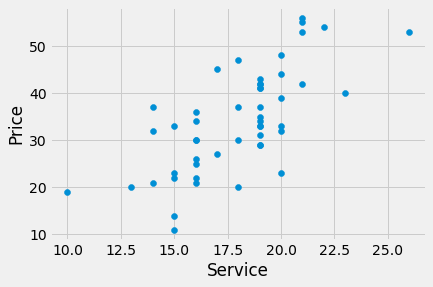

In [9]:
# price vs service
plt.scatter(random['service'], random['price'])
plt.xlabel('Service')
plt.ylabel('Price')
plt.show()

## Q2

In [10]:
X = random.iloc[:,0:3]
Y = random['price']

In [11]:
X.head()

,food,decor,service
0,15.0,22.0,15.0
1,20.0,18.0,20.0
2,23.0,9.0,16.0
3,18.0,16.0,19.0
4,16.0,18.0,15.0


In [12]:
X.shape

(50, 3)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr_multiple = LinearRegression()
lr_multiple.fit(X,Y)

LinearRegression()

In [15]:
pred2 = lr_multiple.predict([[125,148,265]])
# predicting 95% interval
std_dev = Y.values.reshape(-1,1).std()
err = 1.96*std_dev

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [16]:
print("Range for 95% predictive interval= ({0},{1}".format(pred2-err, pred2+err))

Range for 95% predictive interval= ([528.6899421],[570.99573281]


## Q3

In [17]:
lr_multiple.coef_

array([1.79579009, 0.67747911, 0.96193913])

According to the result above, the coefficient for service is the least, hence its the least important feature.
We can also say that food and decor are almost equally important features.

## Q4

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [19]:
X = random.iloc[:,0]
Y = random['price']

In [20]:
X.head()

0    15.0
1    20.0
2    23.0
3    18.0
4    16.0
Name: food, dtype: float64

In [21]:
#feature 1 = food

In [22]:
lr = LinearRegression()
lr.fit(X.values.reshape(-1,1), Y.values.reshape(-1,1))

LinearRegression()

In [23]:
price1 = lr.predict([[125]])
print(price1)

[[323.61377778]]


In [24]:
std_dev = X.values.reshape(-1,1).std()
err = 1.96*std_dev
print("Range for 95% predictive interval= ({0},{1}".format(price1-err, price1+err))

Range for 95% predictive interval= ([[318.35454589]],[[328.87300966]]


In [25]:
# feature 2 = decor

In [26]:
lr2 = LinearRegression()
X = random.iloc[:,1]
Y = random['price']
lr2.fit(X.values.reshape(-1,1), Y.values.reshape(-1,1))

LinearRegression()

In [27]:
price2 = lr2.predict([[148]])
print(price2)

[[218.38704282]]


In [28]:
std_dev = X.values.reshape(-1,1).std()
err = 1.96*std_dev
print("Range for 95% predictive interval= ({0},{1}".format(price2-err, price2+err))

Range for 95% predictive interval= ([[211.40889228]],[[225.36519336]]


In [29]:
# feature 3 = service

In [30]:
lr3 = LinearRegression()
X = random.iloc[:,2]
Y = random['price']
lr3.fit(X.values.reshape(-1,1), Y.values.reshape(-1,1))

LinearRegression()

In [31]:
price3 = lr3.predict([[265]])
print(price3)

[[700.181772]]


In [32]:
std_dev = X.values.reshape(-1,1).std()
err = 1.96*std_dev
print("Range for 95% predictive interval= ({0},{1}".format(price3-err, price3+err))

Range for 95% predictive interval= ([[694.68202457]],[[705.68151942]]


Interpretation of slope refers to the slope of the best fit line acheieved after regression.

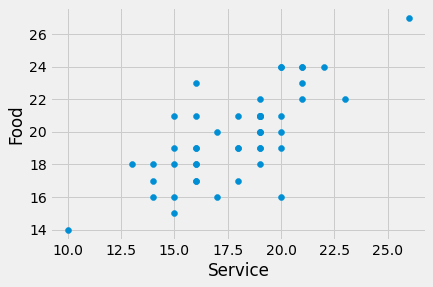

In [33]:
plt.scatter(random['service'], random['food'])
plt.xlabel('Service')
plt.ylabel('Food')
plt.show()

There seems to be linear relationship between food and service with some prediction interval. Therefore it can be expected that the slope (coefficient) turns out to be the close in both of them upon running the regression.

In [34]:
print("Coefficient for feature food: "  + str(lr.coef_))
print("Coefficient for feature decor: "  + str(lr2.coef_))
print("Coefficient for feature service: "  + str(lr3.coef_))

Coefficient for feature food: [[2.75222222]]
Coefficient for feature decor: [[1.40029663]]
Coefficient for feature service: [[2.69589514]]


As it can be seen, the coefficients are close to each other. Hence, exhibiting similar relationships.

## Q5

In [35]:
pred5 = lr_multiple.predict([[20,17,3]])
print(pred5)

[20.5070633]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


As expected food and service are important having one of them quite low means lower price.